# Time Series Forecast : A basic introduction using Python.
( https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000 )

Time series data is an important source for information and strategy used in various businesses. From a conventional finance industry to education industry, they play a major role in understanding a lot of details on specific factors with respect to time. I recently learnt the importance of Time series data in the telecommunication industry and wanted to brush up on my time series analysis and forecasting information. So I decided to work through a simple example using python and I have explained all the details in this blog.

Time series forecasting is basically the machine learning modeling for Time Series data (years, days, hours…etc.)for predicting future values using Time Series modeling .This helps if your data in serially correlated.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
data = pd.read_csv('international-airline-passengers.csv')
data.head()

,Month,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


The data contains a particular month and number of passengers travelling in that month .The data type here is object (month) Let’s convert it into a Time series object and use the Month column as our index.

In [36]:
print('\n Data Types')
data.dtypes



 Data Types


Month         object
passengers     int64
dtype: object

You can see that now the data type is ‘datetime64[ns]’.Now let’s just make it into a series rather than a data frame ( this would make it easier for the blog explanation )



In [37]:
from datetime import datetime

In [38]:
con = data['Month']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [39]:
# convert to timeseries
ts = data['passengers']

In [40]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: passengers, dtype: int64

In [41]:
# 1. specify the index as a string constant
ts['1949-01-01']

112

In [42]:
ts['1949-01-01' : '1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: passengers, dtype: int64

In [43]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: passengers, dtype: int64

# STATIONARITY
This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series. There are a lot of statistical theories to explore stationary series than non-stationary series. (Thus we can bring the fight to our home ground!)

In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

• constant mean

• constant variance

• an auto co-variance that does not depend on time.

These details can be easily retrieved using stat commands in python.

The best way to understand you stationarity in a Time Series is by eye-balling the plot:

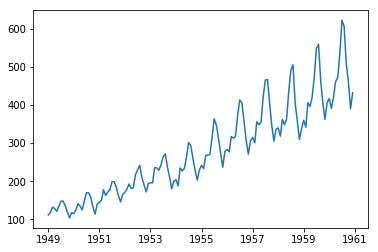

In [44]:
plt.plot(ts)

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

I have written a function for it as I will be using it quite often in this Time series explanation. But before we get to that,let me explain all the concepts in the function.

Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. This is still visual method

NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)

Dickey-fuller Test :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary (the force is strong with this one !!)

More details for Dickey fuller Test.

Function details:

- mean
- Standard deviation (instead of variance)
- Plot original series
- Plot mean
- Plot std
- Plot Dickey-Fuller test

In [45]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

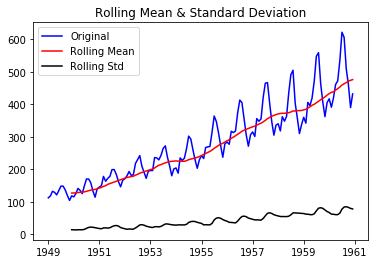

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [46]:
test_stationarity(ts)

This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.

• Note: the signed values are compared and the absolute values.



# MAKING THE TIME SERIES STATIONARY
There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

The basic idea is to model the trend and seasonality in this series, so we can remove it and make the series stationary. Then we can go ahead and apply statistical forecasting to the stationary series. And finally we can convert the forecasted values into original by applying the trend and seasonality constrains back to those that we previously separated.

Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

Let’s start by working on the trend piece.

## Trend

The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation.

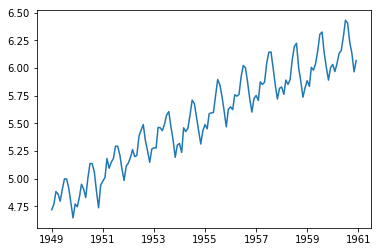

In [47]:
ts_log = np.log(ts)
plt.plot(ts_log)

There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. Some of the common ones are:

• Smoothing: using rolling/moving average

• Aggression: by taking the mean for a certain time period (year/month)

I will be using Smoothing here.

## Smoothing:
    
    In smoothing we usually take the past few instances (rolling estimates) We will discuss two methods under smoothing- Moving average and Exponentially weighted moving average.

## Moving average -

First take x consecutive values and this depends on the frequency if it is 1 year we take 12 values. Lucky for us that Pandas has a function for rolling estimate (“alright alright alright” -Matthew McConaughey!)

In [48]:
moving_avg = ts_log.rolling(12).mean()


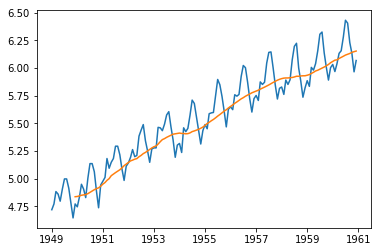

In [49]:
plt.plot(ts_log)
plt.plot(moving_avg)

Now subtract the rolling mean from the original series.

In [50]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: passengers, dtype: float64

In [51]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: passengers, dtype: float64

The reason there are null values is because we take the average of first 12 so 11 values are null. We can also see that in the visual representation. Thus it is dropped for further analysis. Now let’s parse it to the function to check for stationarity.

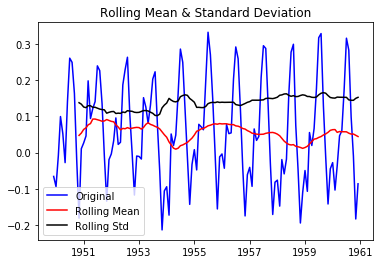

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [52]:
test_stationarity(ts_log_moving_avg_diff)

We notice two things:

• The rolling values are varying slightly but there is no specific trend.

• The test statistics is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary.

In this example we can easily take a time period (12 months for a year), but there are situations where the time period range is more complex like stock price etc. So we use the exponentially weighted moving average (there are other weighted moving averages but for starters, lets use this). The previous values are assigned with a decay factor. Pandas again comes to the rescue with some awesome functions for it, like:

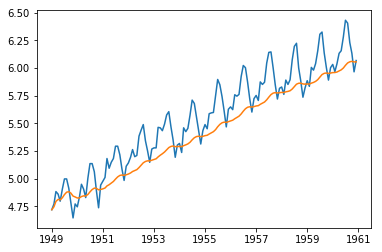

In [53]:
expweighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg)


the parameter (halflife) is assumed 12, but it really depends on the domain. Let’s check stationarity now:



In [54]:
ts_log_ewm_diff = ts_log - expweighted_avg

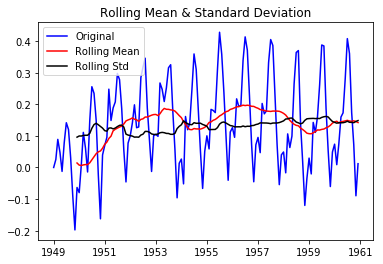

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [55]:
# The hypotheses for the test:

# The null hypothesis for this test is that there is a unit root or the timeseries is non-stationary.
# The alternate hypothesis differs slightly according to which equation you’re using. The basic alternate is 
# that the time series is stationary (or trend-stationary).
# H = 0 non-stationary
# H != 0 Stationary


test_stationarity(ts_log_ewm_diff)

It is stationary because:

• Rolling values have less variations in mean and standard deviation in magnitude.

• the test statistic is smaller than 1% of the critical value. So we can say we are almost 99% confident that this is stationary.

Seasonality (along with Trend)

Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

Differencing:

Here we first take the difference of the value at a particular time with that of the previous time. Now let’s do it in Pandas.

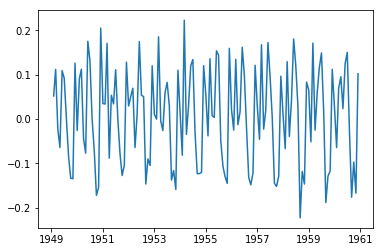

In [56]:
# Take first difference
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

Looks ok to me but let’s parse it using our stationary testing function

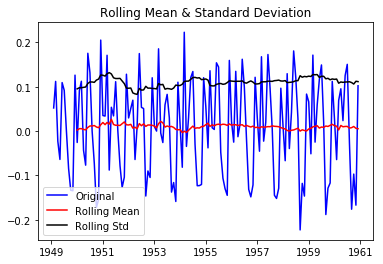

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [57]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

It is stationary because:

• the mean and std variations have small variations with time.

• test statistic is less than 10% of the critical values, so we can be 90 % confident that this is stationary.

Decomposing:

Here we model both the trend and the seasonality, then the remaining part of the time series is returned. Guess what? Yup, we have some awesome function for it. Let’s check it out:

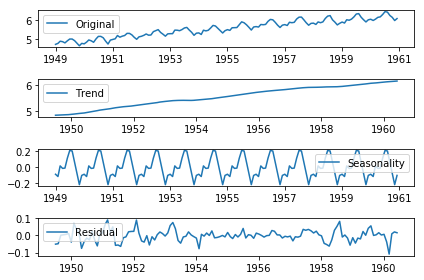

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')
plt.tight_layout()



Remove the trend and seasonality from the Time series and now we can use the residual values. Let’s check stationarity.

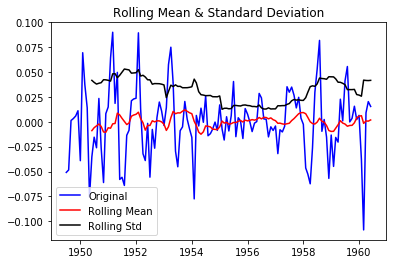

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [59]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)


This is stationary because:

• test statistic is lower than 1% critical values.

• the mean and std variations have small variations with time.

Forecasting a Time Series

Now that we have made the Time series stationary, let’s make models on the time series using differencing because it is easy to add the error , trend and seasonality back into predicted values .

We will use statistical modelling method called ARIMA to forecast the data where there are dependencies in the values.

Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let me explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences .

Now let’s check out on how we can figure out what value of p and q to use. We use two popular plotting techniques; they are:

• Autocorrelation Function (ACF): It just measures the correlation between two consecutive (lagged version). example at lag 4, ACF will compare series at time instance t1…t2 with series at instance t1–4…t2–4

• Partial Autocorrelation Function (PACF): is used to measure the degree of association between y(t) and y(t-p).



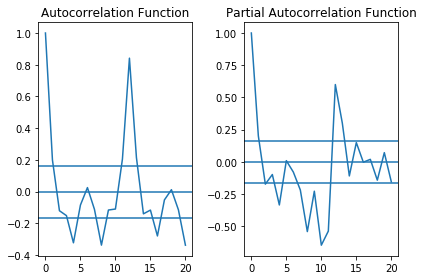

In [60]:
from statsmodels.tsa.arima_model import ARIMA
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method = 'ols')

#plot acf

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0)

plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)))
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)))
plt.title('Autocorrelation Function')

#pacf

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0)
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)))
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)))
plt.title('Partial Autocorrelation Function')
plt.tight_layout()




The two lines on either sides of 0 are the confidence intervals. These can be used to determine the ‘p’ and ‘q’ values as:

• p: The first time where the PACF crosses the upper confidence interval, here its close to 2. hence p = 2.

• q: The first time where the ACF crosses the upper confidence interval, here its close to 2. hence p = 2.

Now, using this make 3 different ARIMA models considering individual as well as combined effects. I will also print the RSS for each. Please note that here RSS is for the values of residuals and not actual series.

# AR Model

/home/ravindra/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ravindra/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

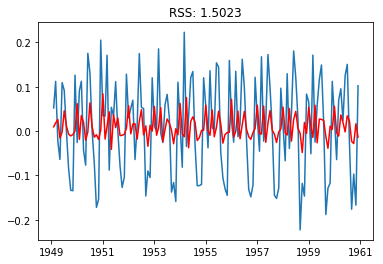

In [61]:
# AR Model

model = ARIMA(ts_log, order = (2,1,0))
results_AR = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))


# MA Model

/home/ravindra/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/ravindra/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 1.5023')

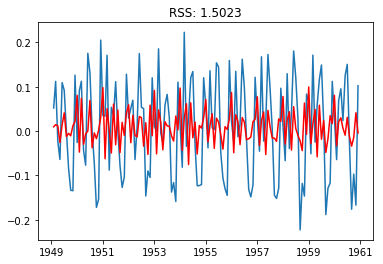

In [62]:
model = ARIMA(ts_log, order = (0,1,2))
results_MA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# ARIMA

model = ARIMA(ts_log, order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


RSS values:

• AR=1.5023

• MA=1.472

• ARIMA =1.0292

ARIMA has the best RSS values.

FINAL STEP: BRINGING THIS BACK TO THE ORIGINAL SCALE

Steps involved:

• First get the predicted values and store it as series. You will notice the first month is missing because we took a lag of 1(shift).

• Now convert differencing to log scale: find the cumulative sum and add it to a new series with a base value (here the first-month value of the log series).

In [63]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
predictions_ARIMA_diff.head()

NameError: name 'results_ARIMA' is not defined

In [64]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

NameError: name 'predictions_ARIMA_diff' is not defined

In [65]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)

predictions_ARIMA_diff.head()

/home/ravindra/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


NameError: name 'predictions_ARIMA_diff' is not defined

• Next -take the exponent of the series from above (anti-log) which will be the predicted value — the time series forecast model.

Now plot the predicted values with the original.

• Find the RMSE

Text(0.5,1,'RMSE: 206.4374')

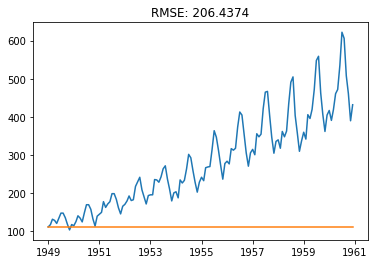

In [66]:
predictions_ARIMA =  np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

The result can be further refined to get a better model. The scope of the blog was to quickly introduce Time Series Forecasting. Hope you guys enjoyed the blog, there a lot more details with respect Time series analysis and forecasting. This is a good place to understanding the theory behind the practical techniques .

# ARIMA using Prophet

In [67]:
from fbprophet import Prophet

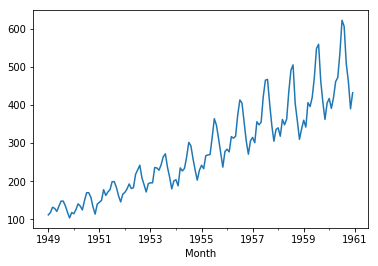

In [68]:
ts.plot()

In [69]:
data = pd.read_csv('international-airline-passengers.csv')

In [70]:
data.columns=['ds','y']

In [71]:
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [72]:
my_model = Prophet(interval_width=0.95)

In [73]:
my_model.fit(data)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ravindra/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [75]:
future_dates = my_model.make_future_dataframe(periods=36)
future_dates.tail()

,ds
175,1961-01-02
176,1961-01-03
177,1961-01-04
178,1961-01-05
179,1961-01-06


In [76]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1961-01-02,469.815985,427.192658,515.484382
176,1961-01-03,472.758294,428.700930,514.828962
177,1961-01-04,474.947568,432.360718,517.827791
178,1961-01-05,476.351758,433.905159,521.943009
179,1961-01-06,476.958675,434.256152,520.772174


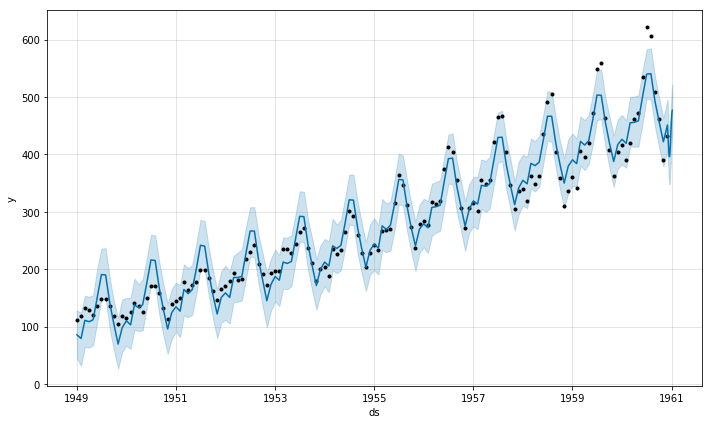

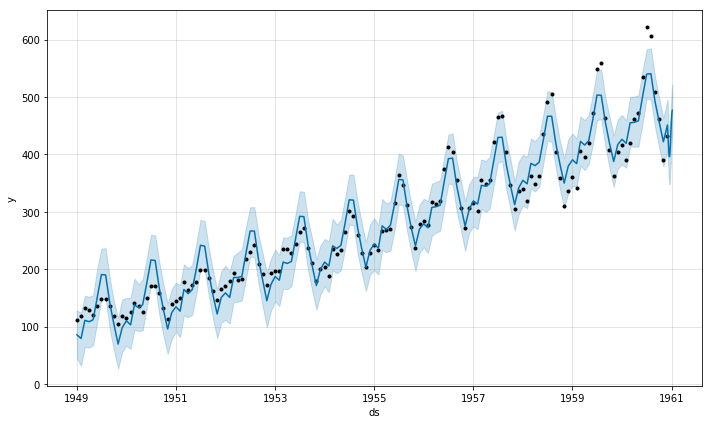

In [78]:
my_model.plot(forecast,uncertainty=True)

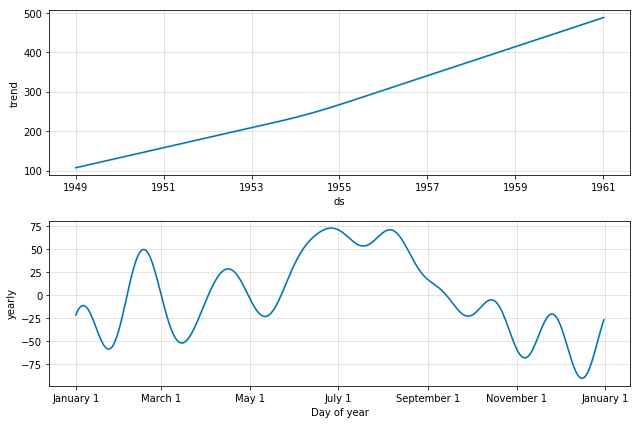

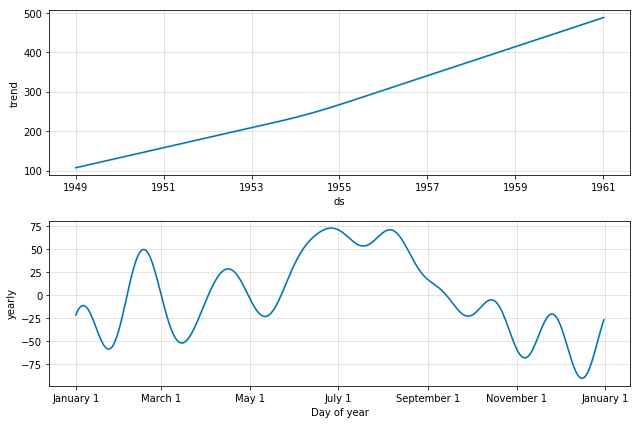

In [79]:
my_model.plot_components(forecast)